# Working with files
Experimental data is saved in a bunch of files - often one file per animal or experiment. 

Let's say we have the data organized in the following folder structure:
```
experiments
├── experiment_1
│   ├── final_behavioral_scores.txt
│   └── initial_behavioral_scores.txt
├── experiment_2
│   ├── final_behavioral_scores.txt
│   └── initial_behavioral_scores.txt
├── experiment_3
│   ├── final_behavioral_scores.txt
│   └── initial_behavioral_scores.txt
├── experiment_4
│   ├── final_behavioral_scores.txt
│   └── initial_behavioral_scores.txt
├── experiment_5
│   ├── final_behavioral_scores.txt
│   └── initial_behavioral_scores.txt
├── information.txt
└── mouse_names.txt
```

__Describe question and discuss analysis steps!__


If we want to analyse the data for all animals or experiments we need to:
1. Discover and list these data files, so you can process each of them automatically in a for loop.
2. Read the data in the files into python variables, perform our analysis on the data, and save the results stored in python variables to results files.

Let's build this workflow step-by-step together!

## Loading and analysing data from a text file
The data is saved in text files - filenames with the extension `.txt`.

__MAKE DATA 2D IN EACH FILE__

To understand the organization of the data inside each file, we can open it in a text editor:
```csv
Time,Responses
1,0.561
2,0.342
3,0.23
4,0.144
```

We see that each files contains a table with two columns: `Time` and `Responses`.

The columns are separated by a comma (`,`). The symbol separating individual columns is also called _delimiter_.

To load the table into a numpy array, we can use the `np.loadtxt` function:

In [5]:
import numpy as np
data = np.loadtxt('experiments/experiment_1/final_behavioral_scores.txt', delimiter='`', skiprows=1)
data

array([ 1.,  2.,  3.,  4.,  5., 56.,  6.])

We can now analyze the data:
...

In [6]:
x = np.mean(data)

## Analyzing a whole data set
So far so good.

Now we want to do that for every file in the folder. And save the results to a new file.

How do we do that?


### Discovering files
The [glob](https://docs.python.org/3/library/glob.html) module allows you to list directories or files in a directory.

_Wild card_ characters allow you to find file names matching a specific pattern:
- `?` matches individual characters
- `*` matches any string of characters

In [7]:
from glob import glob
print(f"{glob('experiments/*')=}")  # find all files and directories in the experiments directory
print(f"{glob('experiments/*.txt')=}")  # find files ending in '.txt'
print(f"{glob('experiments/i*.txt')=}")  # find files and directories in 'experiments', starting with 'i', and ending in '.txt'
print(f"{glob('experiments/experiment_?')=}")  # find files and directories in 'experiments', starting with 'experiment_', and ending in a single unknown character.

print(f"{glob('experiments/*/')=}")  # find all subdirectories
print(f"{glob('experiments/*/*.txt')=}")  # find 'txt' files in all subdirectories

glob('experiments/*')=['experiments/experiment_1', 'experiments/information.txt', 'experiments/mouse_names.txt', 'experiments/experiment_2']
glob('experiments/*.txt')=['experiments/information.txt', 'experiments/mouse_names.txt']
glob('experiments/i*.txt')=['experiments/information.txt']
glob('experiments/experiment_?')=['experiments/experiment_1', 'experiments/experiment_2']
glob('experiments/*/')=['experiments/experiment_1/', 'experiments/experiment_2/']
glob('experiments/*/*.txt')=['experiments/experiment_1/initial_behavioral_scores.txt', 'experiments/experiment_1/final_behavioral_scores.txt', 'experiments/experiment_2/initial_behavioral_scores.txt', 'experiments/experiment_2/final_behavioral_scores.txt']


A bit of nomenclature: Take this path `experiments/experiment_1/final_behavioral_scores.txt`
- `final_behavioral_scores.txt` is the file name, `final_behavioral_scores` is called the file stem, `.txt` is called the suffix or extension
- `experiments` and `experiment_1` are directories or folders. `experiments` is the parent directory of `experiment_1`. `experiment_1` is  a subdirectory of `experiments`
- `/` is the path separator.

We can now list all data files, ending in `.txt` in the `experiment_*` subfolders:

In [9]:
data_files = glob('experiments/experiment_*/*.txt')
data_files

['experiments/experiment_1/initial_behavioral_scores.txt',
 'experiments/experiment_1/final_behavioral_scores.txt',
 'experiments/experiment_2/initial_behavioral_scores.txt',
 'experiments/experiment_2/final_behavioral_scores.txt']

### Load files from a list

In [12]:
for data_file in data_files:
    print(f"Loading {data_file}")
    data = np.loadtxt(data_file, delimiter='`', skiprows=1)


Loading experiments/experiment_1/initial_behavioral_scores.txt
Loading experiments/experiment_1/final_behavioral_scores.txt
Loading experiments/experiment_2/initial_behavioral_scores.txt
Loading experiments/experiment_2/final_behavioral_scores.txt


### Analyzing data from files in a list

Loading experiments/experiment_1/initial_behavioral_scores.txt
Loading experiments/experiment_1/final_behavioral_scores.txt
Loading experiments/experiment_2/initial_behavioral_scores.txt
Loading experiments/experiment_2/final_behavioral_scores.txt


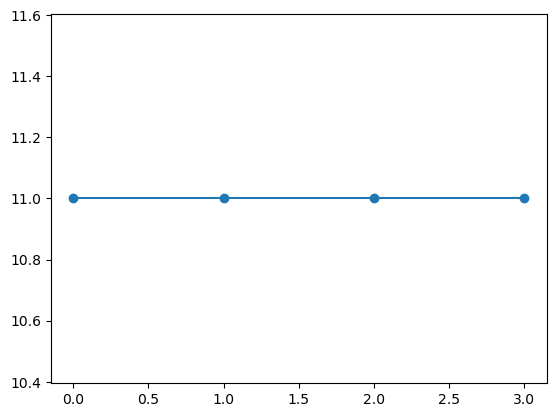

In [ ]:
import matplotlib.pyplot as plt

results = []

for data_file in data_files:
    print(f"Loading {data_file}")
    data = np.loadtxt(data_file, delimiter='`', skiprows=1)

    results.append(np.mean(data))

plt.plot(results, 'o-')

### Saving results to a text file
We can use numpy to save any numpy array to a text file:

In [19]:
np.savetxt('results.txt', results, header='Responses')  # the "header" argument is optional

### Saving with specific names derived from the data file name

Something that requires path manipulations - different file extension, different folder, same filestem



### Manipulating paths
We often need to manipulate path names.

Say we want to process the data in `initial_behavioral_scores.txt` and `final_behavioral_scores.txt` for each experiment in `experiments`, and want to save the results in a folder called `results` that mimics the structure of the data folder: `results/experiment_1/behavior.xls`, `results/experiment_2/behavior.xls`.

We want to generate the paths for the new results files automatically from the paths of the data files. That means we need to manipulate the path names. In one exercise, you will do just that!!

There are two ways of working with paths in python
- [os.path](https://docs.python.org/3/library/os.path.html) (old)
- [pathlib](https://docs.python.org/3/library/pathlib.html) (new but more complicated - we won't cover it here)


In [ ]:
import os.path
my_path = 'parentdir/subdir/name.txt'

print(f"{os.path.splitext(my_path)=}")
my_path_parts = os.path.splitext(my_path)
trunk = my_path_parts[0]
extension = my_path_parts[1]
print(f"{my_path=}, {trunk=}, {extension=}")

# this will split off the file name from the rest of the path:
trunk, head = os.path.split(my_path)
print(f"{trunk=}, {head=}")

# we can split the trunk again to split off the sub directory
new_trunk, new_head = os.path.split(trunk)
print(f"{new_trunk=}, {new_head=}")

print(f"{os.path.basename(my_path)=}")  # returns the filename
print(f"{os.path.dirname(my_path)=}")  # returns the directories

os.path.splitext(my_path)=('parentdir/subdir/name', '.txt')
my_path='parentdir/subdir/name.txt', trunk='parentdir/subdir/name', extension='.txt'
trunk='parentdir/subdir', head='name.txt'
new_trunk='parentdir', new_head='subdir'
os.path.basename(my_path)='name.txt'
os.path.dirname(my_path)='parentdir/subdir'


We now know how to split a path in various ways. How can we assemble the parts into something new?

We can use `os.path.join` with multiple strings as arguments to join them into a new path. This function will use the correct path separator.

In [ ]:
new_path = os.path.join('directory_name', 'subdirectory_name', 'file_name.ext')
print(new_path)

directory_name/subdirectory_name/file_name.ext


What if we want to change the file extension? 
Say our data file is an excel file (extension '.xlsx') and we want to save the results from analyzing that file to a text file (extension '.txt'). 

Since the parts are strings, we can use the `+` operator to concatenate them. This will create a file name with a new suffix:

In [ ]:
data_file_name = 'mouse_276.xls'
print('Load data from', data_file_name)

# First split off the old extension:
data_file_trunk, data_file_ext = os.path.splitext(data_file_name)

# Then add the new extension to the file trunk
results_file_name = data_file_trunk + '.txt'
print('Save result to', results_file_name)


Load data from mouse_276.xls
Save result to mouse_276.txt


### Creating directories
To save files to new directories, we can create them directly with python:

`os.makedirs('tmp/sub1/sub2', exist_ok=True)`

`exist_ok=True` prevents an error if the directory already exists.

### Saving data to numpy files
A more efficient (faster load/save, less disk space) format is the numpy file. There are two ways of saving data to numpy files.

You can save a single variable using the `np.save`. The resulting file should have the extension `npy`.

In [ ]:
import numpy as np
time = np.array([1, 2, 3, 4])
print(time)
np.save('saved_single_variable.npy', time)

[1 2 3 4]


You can load the variabe from the file using `np.load`. Since the file only contained a single variable, `np.load` will return the values of the variable directly:

In [ ]:
loaded_npy = np.load('saved_single_variable.npy')
loaded_npy

array([1, 2, 3, 4])

You can also save multiple variables to a single file using `np.savez`, which will create a file with the extension `npz`.

In [ ]:
time_to_save = np.array([1, 2, 3, 4])
voltage_to_save = np.array([-60, -60, 40, -60])
np.savez('saved_multiple_variables.npz', time=time_to_save, voltage=voltage_to_save)  # the keywords "time" and "voltage" will be the names associated with the saved data variables.
np.savez('saved_multiple_variables_NO.npz', time_to_save, voltage_to_save)  # the keywords "time" and "voltage" will be the names associated with the saved data variables.

Loading an `npz` files will return a dictionary-like data structure, with the names of the saved variables as keys and the variables' data as values:

In [ ]:
loaded_npz = np.load('saved_multiple_variables.npz')
print(loaded_npz)

print("time:", loaded_npz['time'])

for key, val in loaded_npz.items():
    print(f'Variable "{key}" with values "{val}".')

NpzFile 'saved_multiple_variables.npz' with keys: time, voltage
time: [1 2 3 4]
Variable "time" with values "[1 2 3 4]".
Variable "voltage" with values "[-60 -60  40 -60]".
